<a href="https://colab.research.google.com/github/HenriqueFurtado-Dev/Modelos-Classificacao/blob/main/modelo_classificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Feito por: Henrique Furtado ; )


# Classificação: Primeiros passos

Este projeto consistem em analisar dados de uma campanha de marketing para aderência de investimentos. O intuito é usar as informações dos dados para prever se os clientes de um banco vão aplicar o dinheiro em um investimento ou não.

Essa previsão será feita utilizando machine learning e este notebook vai conter os passos para se obter um modelo capaz de realizar as previsões, desde a **leitura**, **análise exploratória**, **separação** e **transformação** dos dados, até o **ajuste**, **avaliação** e **comparação** de modelos de classificação.

# Análise exploratória

Passos para criar o modelo

1 - Visualizar as primeiras informações do DF para verificar números ausentes

2 - Análise exploratória dos dados, verificando os outliers

3 - Tratamento dos dados, e OneHotEnconder para as colunas categoricas



## Fazendo a leitura dos dados

Podemos realizar a leitura dos dados a partir da biblioteca `pandas`. Por conta disso, vamos realizar a importação da biblioteca com o comando `import pandas as pd`.

Como o arquivo de dados está no formato *csv*, vamos realizar a leitura com a função [`read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/marketing_investimento.csv')
data

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos,aderencia_investimento
0,45,casado (a),superior,nao,242,nao,587,1,sim
1,42,casado (a),medio,nao,1289,nao,250,4,sim
2,23,solteiro (a),superior,nao,363,nao,16,18,nao
3,58,divorciado (a),superior,nao,1382,nao,700,1,sim
4,50,casado (a),medio,nao,3357,nao,239,4,sim
...,...,...,...,...,...,...,...,...,...
1263,52,solteiro (a),superior,nao,83,nao,1223,6,sim
1264,35,solteiro (a),superior,nao,5958,nao,215,1,sim
1265,30,solteiro (a),superior,nao,-477,sim,1532,2,sim
1266,42,casado (a),superior,nao,2187,nao,525,3,sim


In [ ]:
data.describe()

,idade,saldo,tempo_ult_contato,numero_contatos
count,1268.000000,1268.000000,1268.000000,1268.000000
mean,41.376972,1443.426656,367.574921,2.715300
std,11.383805,2690.406767,347.969723,2.885642
min,19.000000,-1206.000000,5.000000,1.000000
25%,33.000000,91.250000,134.000000,1.000000
50%,39.000000,491.500000,251.000000,2.000000
75%,49.000000,1623.500000,488.250000,3.000000
max,87.000000,27069.000000,3025.000000,32.000000


Para criar modelos de classificação, precisamos utilizar dados de qualidade, sem inconsistências e sem dados faltantes. Vamos checar se existem dados nulos e o tipo dos dados de cada coluna na base de dados a partir do método [`info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html).

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   idade                   1268 non-null   int64 
 1   estado_civil            1268 non-null   object
 2   escolaridade            1268 non-null   object
 3   inadimplencia           1268 non-null   object
 4   saldo                   1268 non-null   int64 
 5   fez_emprestimo          1268 non-null   object
 6   tempo_ult_contato       1268 non-null   int64 
 7   numero_contatos         1268 non-null   int64 
 8   aderencia_investimento  1268 non-null   object
dtypes: int64(4), object(5)
memory usage: 89.3+ KB


## Explorando os dados

Uma etapa muito importante em projetos de machine learning é a exploração e entendimento dos dados, conhecida como **análise exploratória**. Podemos utilizar gráficos para verificar quais são as informações em cada uma das colunas da base de dados, identificar inconsistências e padrões que possam existir.

Vamos explorar cada uma das colunas da base de dados com o uso da biblioteca `plotly`. Vamos começar pelas variáveis categóricas e depois explorar as variáveis numéricas.

### Variáveis categóricas

In [ ]:
import plotly.express as px

In [ ]:
data.columns

Index(['idade', 'estado_civil', 'escolaridade', 'inadimplencia', 'saldo',
       'fez_emprestimo', 'tempo_ult_contato', 'numero_contatos',
       'aderencia_investimento'],
      dtype='object')

In [ ]:
px.histogram(data, x='aderencia_investimento', text_auto=True)

In [ ]:
px.histogram(data, x='estado_civil', text_auto=True, color='aderencia_investimento', barmode='group')

In [ ]:
px.histogram(data, x='escolaridade', text_auto=True, color='aderencia_investimento', barmode='group')

In [ ]:
px.histogram(data, x='inadimplencia', text_auto=True, color='aderencia_investimento', barmode='group')

In [ ]:
px.histogram(data, x='fez_emprestimo', text_auto=True, color='aderencia_investimento', barmode='group')

### Variáveis numéricas

In [ ]:
px.box(data, x='idade', color='aderencia_investimento')

In [ ]:
px.box(data, x='saldo', color='aderencia_investimento')

In [ ]:
px.box(data, x='tempo_ult_contato', color='aderencia_investimento')

In [ ]:
px.box(data, x='numero_contatos', color='aderencia_investimento')

# Variável alvo

In [ ]:
x = data.drop('aderencia_investimento', axis=1) # Passando a tabela sem a coluna
y = data['aderencia_investimento'] # Passando o target do resultado

# One hot encode


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
colunas = x.columns
colunas

Index(['idade', 'estado_civil', 'escolaridade', 'inadimplencia', 'saldo',
       'fez_emprestimo', 'tempo_ult_contato', 'numero_contatos'],
      dtype='object')

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   idade              1268 non-null   int64 
 1   estado_civil       1268 non-null   object
 2   escolaridade       1268 non-null   object
 3   inadimplencia      1268 non-null   object
 4   saldo              1268 non-null   int64 
 5   fez_emprestimo     1268 non-null   object
 6   tempo_ult_contato  1268 non-null   int64 
 7   numero_contatos    1268 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 79.4+ KB


In [ ]:
one_hot = make_column_transformer((
    OneHotEncoder(drop = 'if_binary'),
    ['estado_civil', 'escolaridade', 'inadimplencia', 'fez_emprestimo'] # faz o enconding das colunas selecionadas
),
  remainder = 'passthrough', # mantém as demais colunas
  sparse_threshold = 0) # Pesquisar sobre


In [ ]:
x = one_hot.fit_transform(x)

In [ ]:
one_hot.get_feature_names_out(colunas)

array(['onehotencoder__estado_civil_casado (a)',
       'onehotencoder__estado_civil_divorciado (a)',
       'onehotencoder__estado_civil_solteiro (a)',
       'onehotencoder__escolaridade_fundamental',
       'onehotencoder__escolaridade_medio',
       'onehotencoder__escolaridade_superior',
       'onehotencoder__inadimplencia_sim',
       'onehotencoder__fez_emprestimo_sim', 'remainder__idade',
       'remainder__saldo', 'remainder__tempo_ult_contato',
       'remainder__numero_contatos'], dtype=object)

In [ ]:
pd.DataFrame(x, columns=one_hot.get_feature_names_out(colunas))

,onehotencoder__estado_civil_casado (a),onehotencoder__estado_civil_divorciado (a),onehotencoder__estado_civil_solteiro (a),onehotencoder__escolaridade_fundamental,onehotencoder__escolaridade_medio,onehotencoder__escolaridade_superior,onehotencoder__inadimplencia_sim,onehotencoder__fez_emprestimo_sim,remainder__idade,remainder__saldo,remainder__tempo_ult_contato,remainder__numero_contatos
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,45.0,242.0,587.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,42.0,1289.0,250.0,4.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,23.0,363.0,16.0,18.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,58.0,1382.0,700.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50.0,3357.0,239.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1263,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,52.0,83.0,1223.0,6.0
1264,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,35.0,5958.0,215.0,1.0
1265,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,30.0,-477.0,1532.0,2.0
1266,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,42.0,2187.0,525.0,3.0


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
y = label_encoder.fit_transform(y)

In [ ]:
y

array([1, 1, 0, ..., 1, 1, 1])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, stratify = y, random_state = 5)

# Modelo Base

In [ ]:
from sklearn.dummy import DummyClassifier

In [ ]:
dummy = DummyClassifier()
dummy.fit(x_treino, y_treino)

DummyClassifier()

In [ ]:
dummy.score(x_teste, y_teste)

0.6025236593059937

# Arvore de decisão

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
arvore = DecisionTreeClassifier(random_state=5)
arvore.fit(x_treino, y_treino)

DecisionTreeClassifier(random_state=5)

In [ ]:
arvore.predict(x_teste)

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,

In [ ]:
arvore.score(x_teste, y_teste)

0.6656151419558359

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [ ]:
nome_colunas = ['casado (a)',
                'divorciado (a)',
                'solteiro (a)',
                'fundamental',
                'medio',
                'superior',
                'inadimplencia',
                'fez_emprestimo',
                'idade',
                'saldo',
                'tempo_ult_contato',
                'numero_contatos']

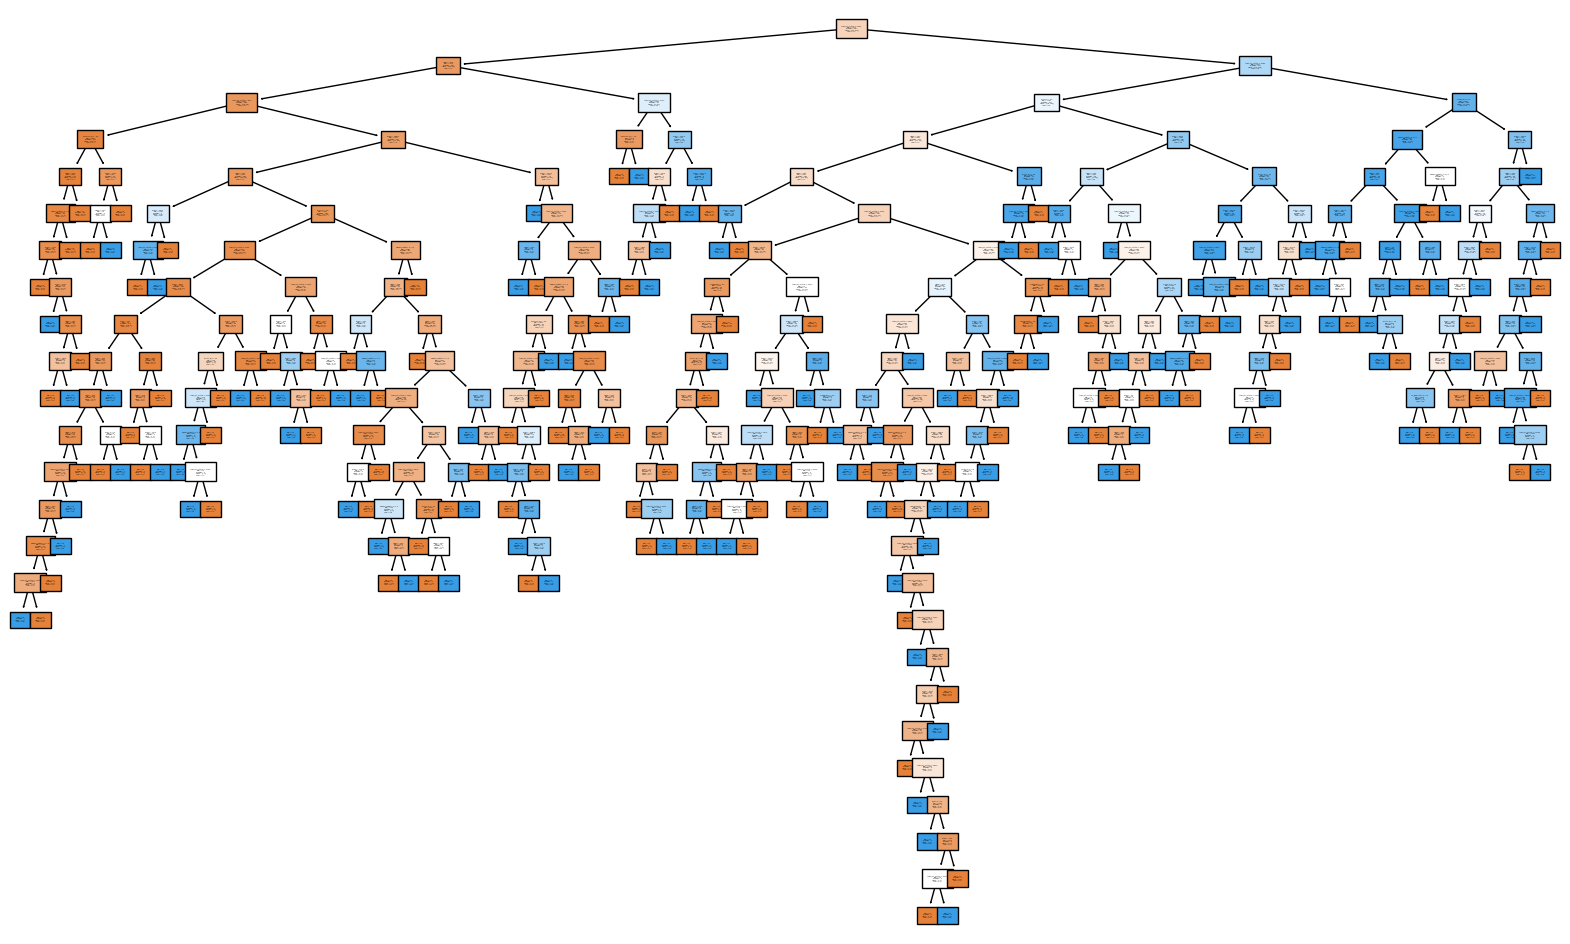

In [ ]:
plt.figure(figsize=(20, 12))
plot_tree(
    arvore, # Passa o modelo treinado
    filled=True, # preenche o modelo
    class_names= ['nao', 'sim'], # Define o 0 e 1 como sim e nao
    fontsize=1, # tamanho da fonte
    feature_names=nome_colunas); # nome das colunas

In [ ]:
arvore.score(x_treino, y_treino) # O modelo acertou tudo pois apenas decorou as descisões

1.0

In [ ]:
arvore = DecisionTreeClassifier(max_depth=3, random_state=5)
arvore.fit(x_treino, y_treino)

DecisionTreeClassifier(max_depth=3, random_state=5)

In [ ]:
arvore.score(x_treino, y_treino)

0.7613038906414301

In [ ]:
arvore.score(x_teste, y_teste)

0.7160883280757098

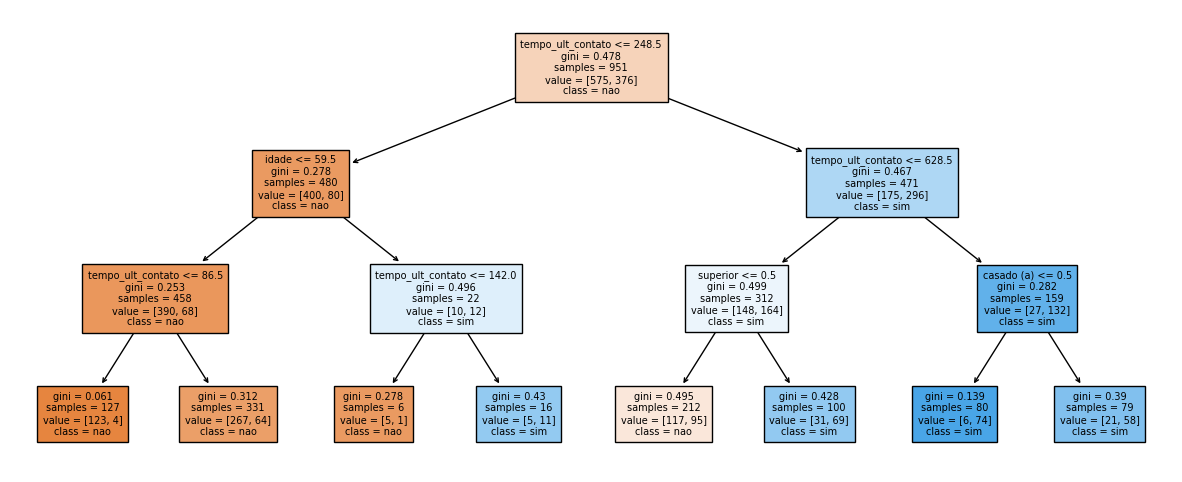

In [ ]:
plt.figure(figsize=(15, 6))
plot_tree(
    arvore, # Passa o modelo treinado
    filled=True, # preenche o modelo
    class_names= ['nao', 'sim'], # Define o 0 e 1 como sim e nao
    fontsize=7, # tamanho da fonte
    feature_names=nome_colunas); # nome das colunas

# Normalizando os dados

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
normalizacao = MinMaxScaler()
x_treino_normalizado = normalizacao.fit_transform(x_treino)

In [ ]:
pd.DataFrame(x_treino)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,33.0,641.0,347.0,2.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,29.0,84.0,1101.0,2.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,42.0,936.0,931.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,58.0,565.0,876.0,1.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,42.0,2974.0,187.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
946,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,32.0,41.0,686.0,5.0
947,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,33.0,-416.0,767.0,2.0
948,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,41.0,4.0,74.0,5.0
949,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,31.0,0.0,71.0,1.0


In [ ]:
pd.DataFrame(x_treino_normalizado)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.205882,0.065564,0.123734,0.032258
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.147059,0.045792,0.396527,0.032258
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.338235,0.076036,0.335022,0.000000
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.573529,0.062866,0.315123,0.000000
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.338235,0.148380,0.065847,0.129032
...,...,...,...,...,...,...,...,...,...,...,...,...
946,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.191176,0.044265,0.246382,0.129032
947,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.205882,0.028043,0.275687,0.032258
948,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.323529,0.042952,0.024964,0.129032
949,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.176471,0.042810,0.023878,0.000000


# KNN
Calculo da distância dos vizinhos mais próximos

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier() # por padrão os 3 vizinhos mais proximos

In [ ]:
knn.fit(x_treino_normalizado, y_treino)

KNeighborsClassifier()

In [ ]:
x_teste_normalizado = normalizacao.fit_transform(x_teste)

In [ ]:
knn.score(x_teste_normalizado, y_teste)

0.6750788643533123

# Escolhendo o melhor modelo

In [ ]:
print(f'Acurácia Dummy: {dummy.score(x_teste, y_teste)}')
print(f'Acurácia Árvore: {arvore.score(x_teste, y_teste)}')
print(f'Acurácia KNN: {knn.score(x_teste_normalizado, y_teste)}')

Acurácia Dummy: 0.6025236593059937
Acurácia Árvore: 0.7160883280757098
Acurácia KNN: 0.6750788643533123


# Salvando o modelo


In [ ]:
import pickle

In [ ]:
with open('modelo_onehot.pkl', 'wb') as arquivo:
  pickle.dump(one_hot, arquivo)

In [ ]:
with open('modelo_arvore.pkl', 'wb') as arquivo:
  pickle.dump(arvore, arquivo)

In [ ]:
data

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos,aderencia_investimento
0,45,casado (a),superior,nao,242,nao,587,1,sim
1,42,casado (a),medio,nao,1289,nao,250,4,sim
2,23,solteiro (a),superior,nao,363,nao,16,18,nao
3,58,divorciado (a),superior,nao,1382,nao,700,1,sim
4,50,casado (a),medio,nao,3357,nao,239,4,sim
...,...,...,...,...,...,...,...,...,...
1263,52,solteiro (a),superior,nao,83,nao,1223,6,sim
1264,35,solteiro (a),superior,nao,5958,nao,215,1,sim
1265,30,solteiro (a),superior,nao,-477,sim,1532,2,sim
1266,42,casado (a),superior,nao,2187,nao,525,3,sim


In [ ]:
novo_dado = {
    'idade': [45],
    'estado_civil':['solteiro (a)'],
    'escolaridade':['superior'],
    'inadimplencia': ['nao'],
    'saldo': [23040],
    'fez_emprestimo': ['nao'],
    'tempo_ult_contato': [800],
    'numero_contatos': [4]
}

In [ ]:
print(novo_dado)

{'idade': [45], 'estado_civil': ['solteiro (a)'], 'escolaridade': ['superior'], 'inadimplencia': ['nao'], 'saldo': [23040], 'fez_emprestimo': ['nao'], 'tempo_ult_contato': [800], 'numero_contatos': [4]}


In [ ]:
novo_dado = pd.DataFrame(novo_dado)
novo_dado

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos
0,45,solteiro (a),superior,nao,23040,nao,800,4


In [ ]:
modelo_one_hot = pd.read_pickle('/content/modelo_onehot.pkl')
modelo_arvore= pd.read_pickle('/content/modelo_arvore.pkl')

é necessario passar pelo modelo de oneHotEncoder

In [ ]:
novo_dado = modelo_one_hot.transform(novo_dado) # passando pelo one hot encoder

In [ ]:
modelo_arvore.predict(novo_dado)

array([1])